# Clutering Evalutation


Today, we will learn how to  evaluate if a clustering model was effective or not.  In the process, we will also learn how to determine if we have the right number of clusters.

In [1]:
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import metrics
import pandas as pd

Extract out the features to `iris_X`

In [2]:
iris_df = sns.load_dataset('iris')
iris_X = iris_df.drop(columns=['species'])

First we will fit the model with the correct number of clusters.

In [3]:
km3 = KMeans(n_clusters=3)
km3.fit(iris_X)

/opt/hostedtoolcache/Python/3.9.16/x64/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

When we use the fit method, it does not return the predictions, but it does store them in the estimator object.

In [4]:
km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [5]:
km2 = KMeans(n_clusters=2)
km2.fit(iris_X)
km4 = KMeans(n_clusters=4)
km4.fit(iris_X)

/opt/hostedtoolcache/Python/3.9.16/x64/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/hostedtoolcache/Python/3.9.16/x64/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

How do we tell if this is good?

One way to intuitively think about a good clustering solution is that every point should be close to points in the same cluster and far from points in other clusters. By definition with Kmeans, they will always be clos*er* to points in the same cluster, but we also what that the clusters aren't just touching, but actually spaced apart, if the clustering actually captures meaningfully different groups.

## Silhouette Score


The [Silhouette score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) computes a ratio of how close points are to points in the same cluster vs other clusters.

$$ s = \frac{b-a}{max(a,b)}$$


a: The mean distance between a sample and all other points in the same class.


b: The mean distance between a sample and all other points in the next nearest cluster.

We can calculate this score for each point and get the average.

If the cluster is really tight, all of the points are close, then a will be small.  
If the clusters are really far apart, b will be large.
If both of these are true then b-a will be close to the value of b and the denominator will be b, so the score will be 1.

If the clusters are spread out and close together, then a and be will be close in value, and the s will be close 0. These are overlapping clusters, or possibly too may clusters for this data.



Let's check our clustering solution:

In [6]:
metrics.silhouette_score(iris_X, km3.labels_)

0.5528190123564101

This looks pretty good. But we can also compare it for the other two models that we fit.

In [7]:
metrics.silhouette_score(iris_X, km2.labels_)

0.6810461692117467

We see in this case this actually fits better.

In [8]:
metrics.silhouette_score(iris_X, km4.labels_)

0.4974551890173759

and 4 fits worse.

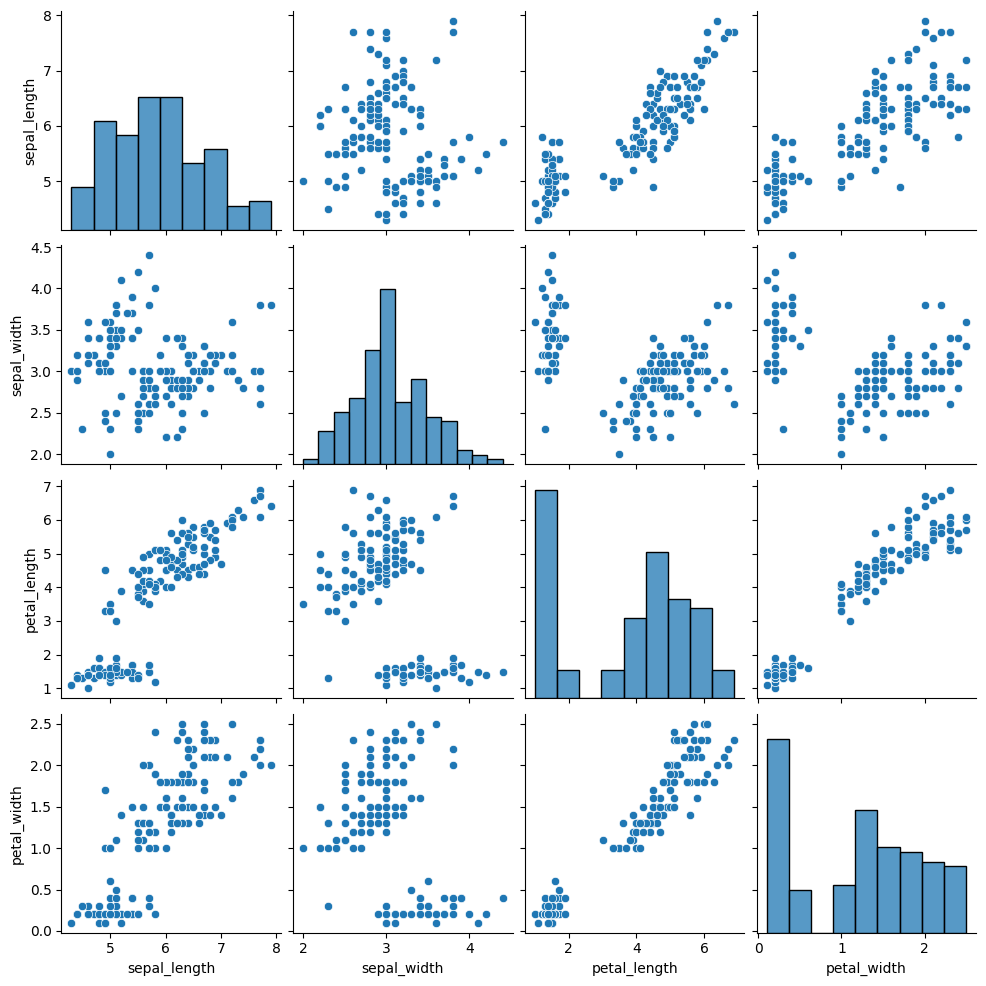

In [9]:
sns.pairplot(iris_X)

If we look at the data, we see that it does look somewhat more like two clusters than 4.  



## What's a good Silhouette Score?

To think through what a good silhouette score is, we can apply the score to data that represents different scenarios.

First, I'll re-sample some data like we used on Monday, but instead of applying K-means and checking the score of the actual algorithm, we'll add a
few different scenarios and add that score.

In [10]:
K = 4
N = 200
classes = list(string.ascii_uppercase[:K])
mu = {c: i for c, i in zip(classes,[[2,2], [6,6], [2,6],[6,2]])}


# sample random cluster assignments
target = np.random.choice(classes,N)

# sample points with different means according to those assignments
data = [np.random.multivariate_normal(mu[c],.25*np.eye(2)) for c in target]
feature_names = ['x' + str(i) for i in range(2)]
df = pd.DataFrame(data = data,columns = feature_names)

# save the true assignments
df['true'] = target

# random assignments, right number of clusters
df['random'] = np.random.choice(classes,N)

# random assignments, way too many clusters
charsK4 = list(string.ascii_uppercase[:K*4])
df['random10'] = np.random.choice(charsK4,N)

# Kmeans with 2x number of clusters
kmrK2 = KMeans(K*2)
kmK2.fit(df[['x0','x1']])
df['km' + str(K*2)] = kmK2.labels_

# assign every point to its own cluster
df['id'] = list(range(N))

df.head()

NameError: name 'string' is not defined

In [11]:
assignment_cols = ['true','random', 'random10','km8','id']

s = [metrics.silhouette_score(iris_X, df[col]) for col in assignment_cols]

pd.Series(data = s,index=assignment_cols)

NameError: name 'df' is not defined

In [12]:
[sns.pairplot(data =df, hue=col, vars= feature_names) for col in assignment_cols]

NameError: name 'df' is not defined

## Mutual Information


````{margin}
```{admonition} Further Reading
Sklearn proides many [mutual information based scores](https://scikit-learn.org/stable/modules/clustering.html#mutual-information-based-scores). See the user guide for definitions of each, pros and cons and examples.
```
````
When we know the truth, we can see if the learned clusters are related to the true groups, we can't compare them like accuracy but we can use a metric that is intuitively like a correlation for categorical variables, the mutual information.

Formally mutual information uses the joint distribution between the true labels and the cluster assignments to see how much they co-occur.  If they're the exact same, then they have maximal mutual information.  If they're completely and independent, then they have 0 mutual information.
Mutual information is related to entropy in physics.

The [`mutual_info_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html#sklearn.metrics.mutual_info_score) method in the `metrics` module computes mutual information.

In [13]:
metrics.mutual_info_score(iris_df['species'],km2.labels_)

0.5738298777087831

In [14]:
metrics.mutual_info_score(iris_df['species'],km3.labels_)

0.8255910976103357

In [15]:
metrics.mutual_info_score(iris_df['species'],km4.labels_)

0.8846414796605857

When we know the truth, we can see if the learned clusters are related to the true groups, we can't compare them like accuracy but we can use a metric that is intuitively like a correlation for categorical variables, the mutual information.

The `adjusted_mutual_info_score` methos in the `metrics` module computes a version of mutual information that is normalized to have good properties. Apply that to the two different clustering solutions and to a solution for K=4.

In [16]:
metrics.adjusted_mutual_info_score(iris_df['species'],km3.labels_)

0.7551191675800486

In [17]:
metrics.adjusted_mutual_info_score(iris_df['species'],km2.labels_)

0.653838071376278

In [18]:
metrics.adjusted_mutual_info_score(iris_df['species'],km4.labels_)

0.7151742230795869

## Questions After Class

### If the silhouette score is 0 does it mean that both clusters are the almost the same?

Yes

### Are there any other scores to look at to determine best number of clusters?

Any of the scores can be used in that way.  And, next week, we will learn how to optimize models.